# PROJECT: AVIATION STRATEGY AND RISK EVASION

### This notebook is aimed at cleaning and analysing data from the data.csv file Aviation Accident Database & Synopses from 1963 up to 2023 then using that data to come up with bussnness insights that will enable the company to venture into the aviation industry and diversify its portfolio.

### The insights gathered at the end will help the company determine the type of aircraft to invest on and come up with a low risk strategy that will benefit the company.

## Main Objectives(GOALS) 1.0.1

### At the end of this notebook, this are the goals I strive to achirve:
#### 1.0.1.Clean the data
#### 1.Find the best aircraft type for the company to purchase
#### 2.Find the best season for involvement
#### 3.Find the best OVERAL location for operation
#### 4.Find the best location of operation for specific aircrafts
#### 5.Find the most risk phase of flight
#### 6.Find the best weather condition for operation
#### 7.Find wich aircraft poses more risk to human life
#### 8.From the analysis come up with concrete business recommendations

## OBJECTIVES 1.0.1 :phase 1>Data cleaning

### At the end of this data cleaning phase this are the goals
#### 1.Clean the unfillterd data to something more workable
#### 2.Find colums that meaningfull insights can be derived from and drop the rest
#### 3.Find your location of intrest
#### 3.From the corilation between the columns find objectives that can be used to expand the company
#### 4.Use those columns to draw neat visualizations



## Phase 1

In [2]:
# first we are gona import all the neccesary librayrs neccesary for data cleaning
import numpy as np
import pandas as pd

In [3]:
# load the aviationdata.csv
# were gona use encoding='ISO-8859-1' since it has special characters
aviation=pd.read_csv("./data/AviationData.csv",encoding='ISO-8859-1')
#were gonna create a copy of the original data frame so as to not not corupt it
aviation_copy=aviation.copy()

C:\Users\josep\AppData\Local\Temp\ipykernel_34892\431989727.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation=pd.read_csv("./data/AviationData.csv",encoding='ISO-8859-1')


In [4]:
#lets load a sample to see if it loaded and get a brief intoduction to the data set
aviation_copy.sample(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88672,20221017106137,Accident,WPR23LA013,2022-10-15,"Tucson, AZ",United States,032832N,1111028W,RYN,NaN,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,NaN,22-11-2022
36278,20001206X02447,Accident,FTW95LA026,1994-10-23,"MOUNTAIN VIEW, OK",United States,NaN,NaN,NONE,GEORGES,...,Personal,NaN,0.0,1.0,0.0,0.0,VMC,Takeoff,Probable Cause,09-05-1995
867,20020917X02241,Accident,LAX82DUJ35,1982-04-17,"NEAR TUCSON, AZ",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,VMC,Approach,Probable Cause,17-04-1983
32280,20001211X11817,Accident,DEN93LA028,1993-02-28,"ENGLEWOOD, CO",United States,NaN,NaN,APA,CENTENNIAL AIRPORT,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Landing,Probable Cause,25-10-1993
14454,20001213X33395,Accident,NYC86FFJ01,1986-04-20,"BETHANY, NY",United States,NaN,NaN,NaN,BETHANY HALES AIRSTRIP,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,NaN


In [5]:
# now we ckeck the number oc collumns,null values and the data type
aviation_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
# we can now identify and drop colums that will not give us any meaningfull insight
# the cretaria i used is based on the number of null value and irlevance to the main goal
aviation_copy.drop(columns=["Event.Id","Accident.Number","Airport.Code","Registration.Number","Publication.Date",
                       "Schedule","Amateur.Built","Number.of.Engines","Air.carrier","FAR.Description","Air.carrier",
                       "Report.Status","Injury.Severity","Airport.Name","Latitude","Longitude","Make"],inplace=True)
aviation_copy.head()

,Investigation.Type,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NaN,108-3,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,NaN,PA24-180,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,NaN,172M,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,NaN,112,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Destroyed,NaN,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [7]:
# since 91% of the data is in accidents we are going to:
# first drop the rows that contain inccidents
aviation_copy = aviation_copy[aviation_copy["Investigation.Type"].str.contains("Accident",na=False)]
# we can now drop the investigation type column
aviation_copy.drop(columns=["Investigation.Type"],inplace=True)
aviation_copy.head()

,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NaN,108-3,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,NaN,PA24-180,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Destroyed,NaN,172M,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Destroyed,NaN,112,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,1979-08-02,"Canton, OH",United States,Destroyed,NaN,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [8]:
# since this project is aimed at finding good bussnes risk evation strategy were gona remove all the rows that containe null values in the aircraft damage column
aviation_copy.dropna(subset=["Aircraft.damage"],inplace=True)

#### I have identified  USA as my country of intrest in this project

In [9]:
#we are now going to filter the data usint the sting usa to get only planes in the usa
# we are gonna use na=False due to the na values
aviation_copy = aviation_copy[aviation_copy["Country"].str.contains("United States",na=False)]
# we can now drop the country column
aviation_copy.drop(columns=["Country"],inplace=True)
aviation_copy.head()

,Event.Date,Location,Aircraft.damage,Aircraft.Category,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",Destroyed,NaN,108-3,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",Destroyed,NaN,PA24-180,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",Destroyed,NaN,172M,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,1977-06-19,"EUREKA, CA",Destroyed,NaN,112,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,1979-08-02,"Canton, OH",Destroyed,NaN,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


#### season

In [10]:
#to create the seasons we have to get the months 
#lets first create the months column
aviation_time=pd.to_datetime(aviation_copy["Event.Date"])
aviation_copy["Event.Date"]=aviation_time
aviation_copy["Event.Month"]=aviation_copy["Event.Date"].dt.month


In [11]:
# now lets group the months to season
# Define the function to map months to seasons 
def get_season(month):
     if month in [12, 1, 2]:
         return "Winter" 
     elif month in [3, 4, 5]:
         return "Spring"
     elif month in [6, 7, 8]:
         return "Summer"
     elif month in [9, 10, 11]:
         return "Autumn" 
aviation_copy["Season"] = aviation_copy["Event.Month"].apply(get_season)

In [12]:
# we can now drop the month column
aviation_copy.drop(columns=["Event.Month"],inplace=True)

In [13]:
# we are now going to save this cleaned data set as aviation cleaned
aviation_copy.to_csv("./data/aviation_clean.csv",index=False)

### at the end of phase one i was able to drop all the unecesary colums and find my objectives

## Phase 2

## Objectives 1.0.2 phase 2>Data analysis

### At the end of this data phase this are the goals
#### 1.Pair collums in accordance to the objectives that will be used in visualization and assighn to a variable
#### 2.From the analysis come up with concrete business recommendations


In [14]:
# were first gonna load the cleaned data set
aviation_clean=pd.read_csv("./data/aviation_clean.csv")
aviation_clean.sample(5)

C:\Users\josep\AppData\Local\Temp\ipykernel_34892\2127466509.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_clean=pd.read_csv("./data/aviation_clean.csv")


,Event.Date,Location,Aircraft.damage,Aircraft.Category,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Season
1918,1982-07-18,"PITTSBURGH, PA",Substantial,Airplane,C23,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,Landing,Summer
17874,1987-10-10,"CUMMING, GA",Substantial,NaN,150L,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Autumn
21595,1989-05-17,"LINDEN, MI",Destroyed,NaN,140,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Landing,Spring
16406,1987-04-24,"OMAHA, NE",Substantial,NaN,ERCOUPE,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Descent,Spring
42329,1998-11-21,"EDGEWATER, MD",Destroyed,NaN,RV-6,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,Approach,Autumn


##### Objective 1>Find the best aircraft type for the company to purchase

In [15]:
#To find the best aircraft to parchase were gona use the columns Aircraft.damage,Aircraft.category,model,engine.type
#pairing the colums to a single variable
#we need to remove the colums from the aircrafrt type,Engine.Type,Model that have null values
aviation_clean.dropna(subset=["Aircraft.Category","Engine.Type","Model"],inplace=True)
aviation_clean_ob1=aviation_clean.loc[:,["Aircraft.damage","Aircraft.Category","Model","Engine.Type"]]
aviation_clean_ob1

,Aircraft.damage,Aircraft.Category,Model,Engine.Type
5,Substantial,Airplane,DC9,Turbo Fan
7,Substantial,Airplane,140,Reciprocating
8,Substantial,Airplane,401B,Reciprocating
12,Destroyed,Airplane,17-30A,Reciprocating
13,Destroyed,Airplane,R172K,Reciprocating
...,...,...,...,...
78620,Substantial,Airplane,150,Reciprocating
78626,Substantial,Airplane,177RG,Reciprocating
78638,Substantial,Airplane,B-60,Reciprocating
78686,Substantial,Airplane,MS-500,Reciprocating


##### Objective 2>Find the best season for involvement

In [16]:
# to find the best season for involvemet we have to group aircraft damage and season
aviation_clean_ob2=aviation_clean.loc[:,["Aircraft.damage","Season"]]
aviation_clean_ob2

,Aircraft.damage,Season
5,Substantial,Autumn
7,Substantial,Winter
8,Substantial,Winter
12,Destroyed,Winter
13,Destroyed,Winter
...,...,...
78620,Substantial,Autumn
78626,Substantial,Autumn
78638,Substantial,Autumn
78686,Substantial,Autumn


##### Objective 3>Find the best overal location for operation

In [17]:
# we are going to use the columns location and aicraft damage
# we are going to drop the null values from the location column
aviation_clean.dropna(subset=["Location"],inplace=True)
# since we have more than 20,000 locations we can use the top 10 ones
top_locations =aviation_clean['Location'].value_counts().head(10).index 
#Filter the DataFrame to include only rows with the top locations
aviation_clean_ob3 = aviation_clean[aviation_clean['Location'].isin(top_locations)]
# Ensure only the relevant columns are included 
aviation_clean_ob3 = aviation_clean_ob3.loc[:, ["Location","Aircraft.damage"]]
aviation_clean_ob3


,Location,Aircraft.damage
49851,"Palmer, AK",Destroyed
56627,"Anchorage, AK",Destroyed
58003,"Phoenix, AZ",Destroyed
58004,"Phoenix, AZ",Destroyed
58244,"Reno, NV",Destroyed
...,...,...
78471,"Palmer, AK",Substantial
78486,"Fairbanks, AK",Substantial
78524,"Las Vegas, NV",Substantial
78544,"Anchorage, AK",Substantial


##### Objective 4>Find the best location of operation for specific aircrafts

In [18]:
# we are going to use the columns location ,category and aicraft damage
# we are going to drop the null values from the category column
aviation_clean.dropna(subset=["Aircraft.Category"],inplace=True)
aviation_clean_ob4=aviation_clean.loc[:,["Location","Aircraft.damage","Aircraft.Category"]]
aviation_clean_ob4

,Location,Aircraft.damage,Aircraft.Category
5,"BOSTON, MA",Substantial,Airplane
7,"PULLMAN, WA",Substantial,Airplane
8,"EAST HANOVER, NJ",Substantial,Airplane
12,"HOMER, LA",Destroyed,Airplane
13,"HEARNE, TX",Destroyed,Airplane
...,...,...,...
78620,"Iola, TX",Substantial,Airplane
78626,"Dacula, GA",Substantial,Airplane
78638,"Ardmore, OK",Substantial,Airplane
78686,"Houston, TX",Substantial,Airplane


##### Objective 5>Find the most risk phase of flight

In [19]:
# we are going to use the columns aircraft damage and Broad.phase.of.flight
# we have to drop the null values in phase of flight
aviation_clean.dropna(subset=["Broad.phase.of.flight"],inplace=True)
aviation_clean_ob5=aviation_clean.loc[:,["Broad.phase.of.flight","Aircraft.damage"]]
aviation_clean_ob5

,Broad.phase.of.flight,Aircraft.damage
5,Climb,Substantial
7,Takeoff,Substantial
8,Landing,Substantial
12,Cruise,Destroyed
13,Takeoff,Destroyed
...,...,...
58743,Approach,Destroyed
58744,Maneuvering,Substantial
58745,Maneuvering,Substantial
58746,Takeoff,Substantial


##### Objective 6>Find the best weather condition for operation

In [20]:
# to find he best weather conditn for operation were gonna use the colmns weather and aircraft damage
# we have to remove the null values in the column weather first
aviation_clean.dropna(subset=["Weather.Condition"],inplace=True)
aviation_clean_ob6=aviation_clean.loc[:,["Weather.Condition","Aircraft.damage"]]
aviation_clean_ob6

,Weather.Condition,Aircraft.damage
5,VMC,Substantial
7,VMC,Substantial
8,IMC,Substantial
12,IMC,Destroyed
13,IMC,Destroyed
...,...,...
58743,IMC,Destroyed
58744,VMC,Substantial
58745,VMC,Substantial
58746,VMC,Substantial


##### Objective 7>Find wich aircraft poses more risk to human life

In [21]:
# to find wich aircraft category poses more risck to humans we are gona use the columns aircraft category,Total.Fatal.Injuries,total serious injuries,total minor injuries,total uninjured
# we are first gona drop the missing rows
aviation_clean.dropna(subset=["Aircraft.Category","Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"],inplace=True)
aviation_clean_ob7=aviation_clean.loc[:,["Aircraft.Category","Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]]
aviation_clean_ob7

,Aircraft.Category,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
7,Airplane,0.0,0.0,0.0,2.0
8,Airplane,0.0,0.0,0.0,2.0
12,Airplane,0.0,0.0,1.0,0.0
13,Airplane,1.0,0.0,0.0,0.0
14,Airplane,1.0,0.0,0.0,0.0
...,...,...,...,...,...
58732,Airplane,0.0,0.0,0.0,1.0
58733,Airplane,0.0,0.0,2.0,0.0
58737,Airplane,0.0,1.0,0.0,0.0
58742,Gyrocraft,2.0,0.0,0.0,0.0


### at the end of this second phase i was able to group my data inaccordance to my objectives

# Phase 3

## Objectives 1.0.3 phase 3>Data visualization

### At the end of this data phase this are the goals
#### 1.use the colums from the data analysis phase to come up with visualizations

In [22]:
# we are gona import all the neccesary librals that we'll using visualization
import matplotlib.pyplot as plt
import seaborn as sns
# were also gona import the df libralys since there built ontop of that
import numpy as np
import pandas as pd
import plotly.express as px

In [23]:
# first we are gona create a function that is gona enable us to call our graphs wich will be used in analysis in phase 4
# Function to display the plot 
def show_plot(plot):
     plt.show()

## Objective 1>Find the best aircraft type for the company to purchase

#### Here we are going to plot 2 graphs that will help us know the best lowrisk aircraft to purchase:
##### 1.The first one is Count of Aircraft Ancidents by Category and Damage Type
##### 2.The second one is Count of Aircraft Incidents by Engine Type and Damage Type


c:\Users\josep\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

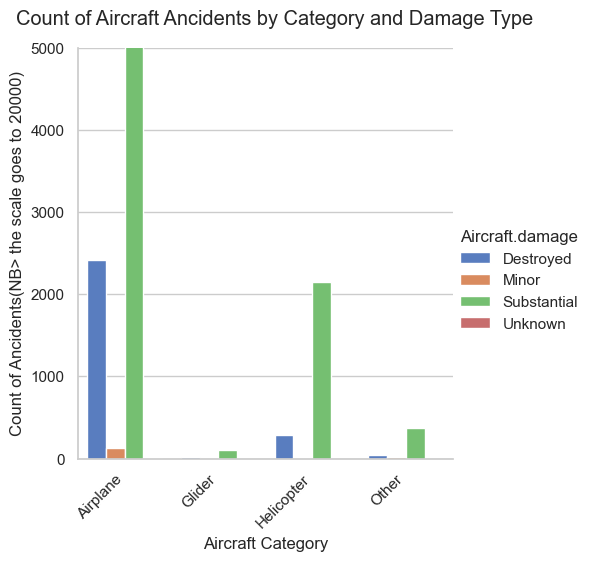

In [24]:
# first aggregate the data
agg_data = aviation_clean_ob1.groupby(['Aircraft.Category', 'Aircraft.damage']).size().reset_index(name='Count')
# then reclassify categories 
agg_data['Aircraft.Category'] = agg_data['Aircraft.Category'].apply(lambda x: x if x in ['Airplane', 'Helicopter', 'Glider'] else 'Other')
# Re-aggregate after reclassification 
agg_data = agg_data.groupby(['Aircraft.Category', 'Aircraft.damage']).sum().reset_index()
# Set the style 
sns.set(style="whitegrid") 
# Create the plot
plt.figure(figsize=(14, 8))
aviation_clean_ob1_visual1= sns.catplot( x="Aircraft.Category", y="Count", hue="Aircraft.damage", kind="bar", data=agg_data, palette="muted" )
aviation_clean_ob1_visual1.set_xticklabels(rotation=45, ha='right')
# Rotate x-axis labels and align them
aviation_clean_ob1_visual1.set_axis_labels("Aircraft Category", "Count of Ancidents(NB> the scale goes to 20000)")
aviation_clean_ob1_visual1.fig.suptitle("Count of Aircraft Ancidents by Category and Damage Type", y=1.03)
# Expand the y-axis scale
aviation_clean_ob1_visual1.set(ylim=(0, 5000))
# Display the plot by calling the variable 
show_plot(aviation_clean_ob1_visual1)

##### graph 2

C:\Users\josep\AppData\Local\Temp\ipykernel_34892\2321051449.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  aviation_clean_ob1_visual2.set_xticklabels(aviation_clean_ob1_visual2.get_xticklabels(), rotation=45)


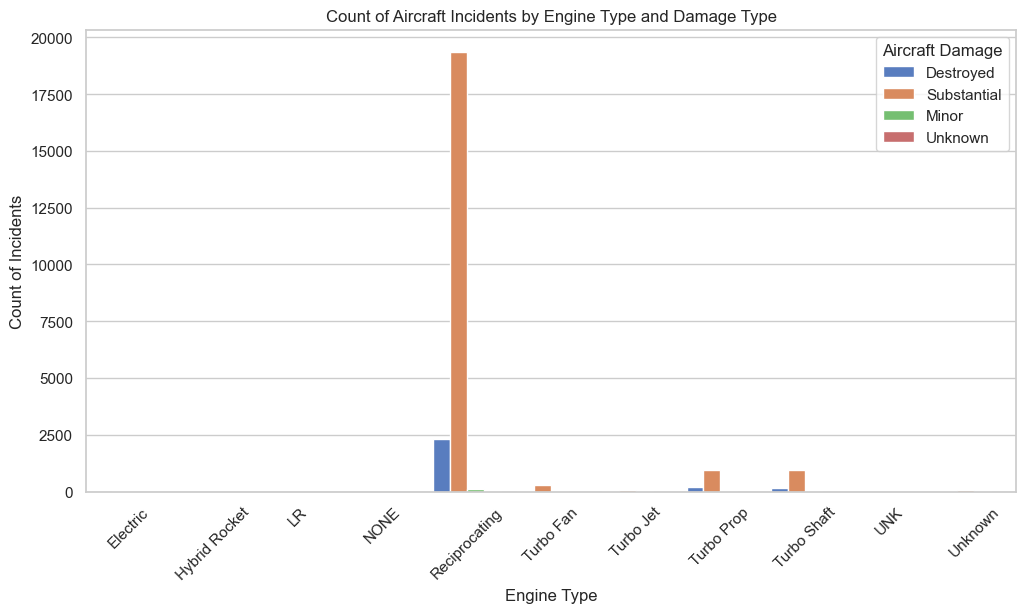

In [25]:
# Aggregate the data 
agg_data = aviation_clean_ob1.groupby(['Engine.Type', 'Aircraft.damage']).size().reset_index(name='Count')
# Set the style 
sns.set(style="whitegrid")
# Create the bar plot 
plt.figure(figsize=(12, 6))
aviation_clean_ob1_visual2= sns.barplot( x="Engine.Type", y="Count", hue="Aircraft.damage", data=agg_data, palette="muted" )
aviation_clean_ob1_visual2.set_xticklabels(aviation_clean_ob1_visual2.get_xticklabels(), rotation=45)
plt.xlabel("Engine Type")
plt.ylabel("Count of Incidents")
plt.title("Count of Aircraft Incidents by Engine Type and Damage Type")
plt.legend(title="Aircraft Damage")
show_plot(aviation_clean_ob1_visual2)

## Objective 2>Find the best season for involvement

#### Here we are going to plot 1 graph that will help us know the best low risk season for involvement
##### 1.This is a count plot showing Count of Aircraft Incidents by Season and Damage Type

C:\Users\josep\AppData\Local\Temp\ipykernel_34892\2655093918.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  aviation_clean_ob2_visual.set_xticklabels(aviation_clean_ob2_visual.get_xticklabels(), rotation=45, ha='right')


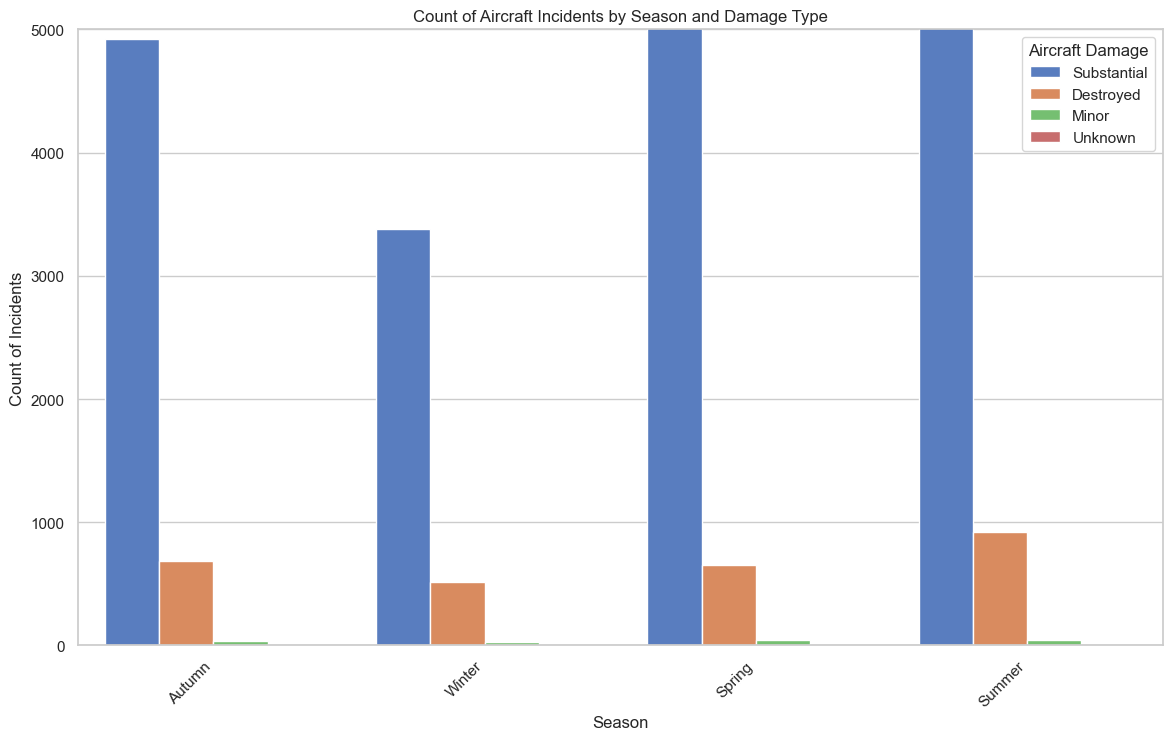

In [26]:
# Create the count plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
aviation_clean_ob2_visual= sns.countplot(x="Season", hue="Aircraft.damage", data=aviation_clean_ob2, palette="muted")
aviation_clean_ob2_visual.set_xticklabels(aviation_clean_ob2_visual.get_xticklabels(), rotation=45, ha='right')
plt.xlabel("Season")
plt.ylabel("Count of Incidents")
plt.title("Count of Aircraft Incidents by Season and Damage Type")
plt.legend(title="Aircraft Damage")
plt.ylim(0, 5000)
show_plot(aviation_clean_ob2_visual)

## Objective 3>Find the best OVERAL location for operation

#### Here we are going to plot 1 graph that will help us know the best location for overal operation
##### 1.This is a Bar plot showing Count of Aircraft Incidents by Location and Damage Type

C:\Users\josep\AppData\Local\Temp\ipykernel_34892\566048736.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  aviation_clean_ob3_visual.set_xticklabels(aviation_clean_ob3_visual.get_xticklabels(), rotation=90, ha='right')


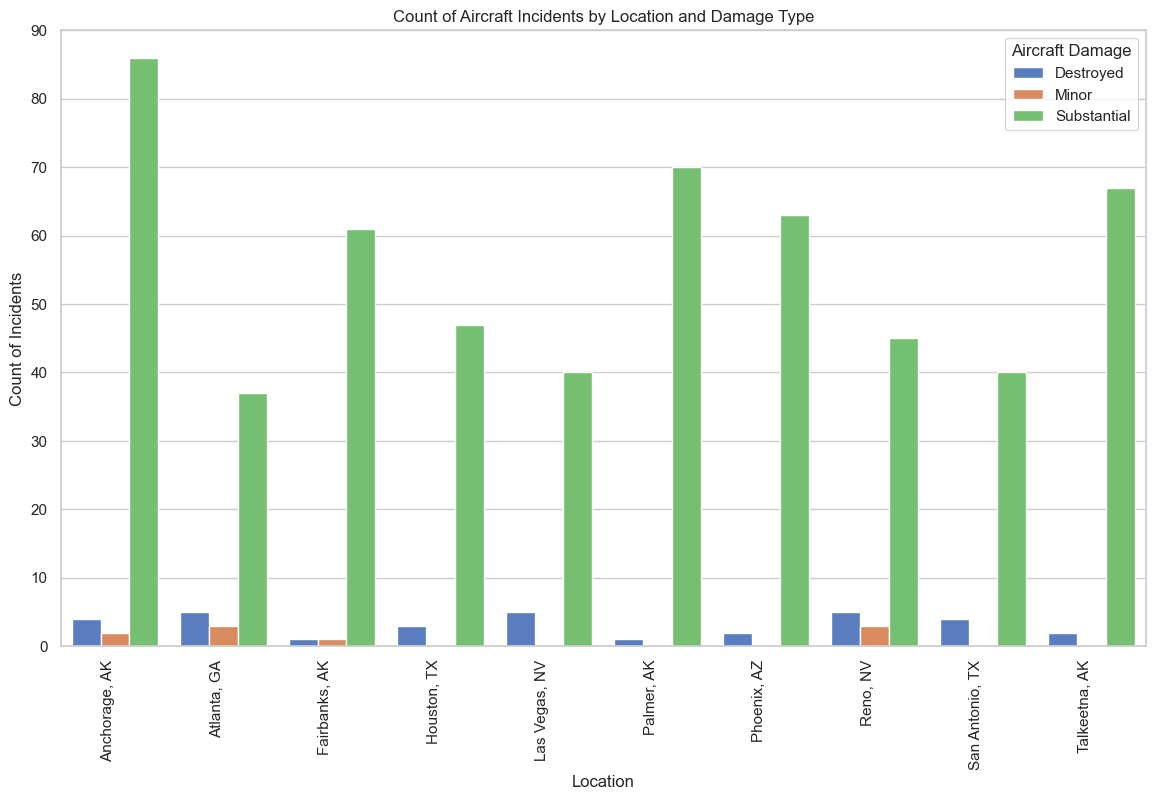

In [31]:
# Aggregate the data
agg_data = aviation_clean_ob3.groupby(['Location', 'Aircraft.damage']).size().reset_index(name='Count')

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
aviation_clean_ob3_visual = sns.barplot(x="Location", y="Count", hue="Aircraft.damage", data=agg_data, palette="muted")
aviation_clean_ob3_visual.set_xticklabels(aviation_clean_ob3_visual.get_xticklabels(), rotation=90, ha='right')
plt.xlabel("Location")
plt.ylabel("Count of Incidents")
plt.title("Count of Aircraft Incidents by Location and Damage Type")
plt.legend(title="Aircraft Damage")
plt.ylim(0,90) 
show_plot(aviation_clean_ob3_visual)

## Objective 5>Find the most risk phase of flight
##### 1.This is a Bar plot showing Count of Aircraft Incidents by Broad.phase.of.flight and Damage Type

C:\Users\josep\AppData\Local\Temp\ipykernel_34892\3903502768.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  aviation_clean_ob5_visual.set_xticklabels(aviation_clean_ob5_visual.get_xticklabels(), rotation=90, ha='right')


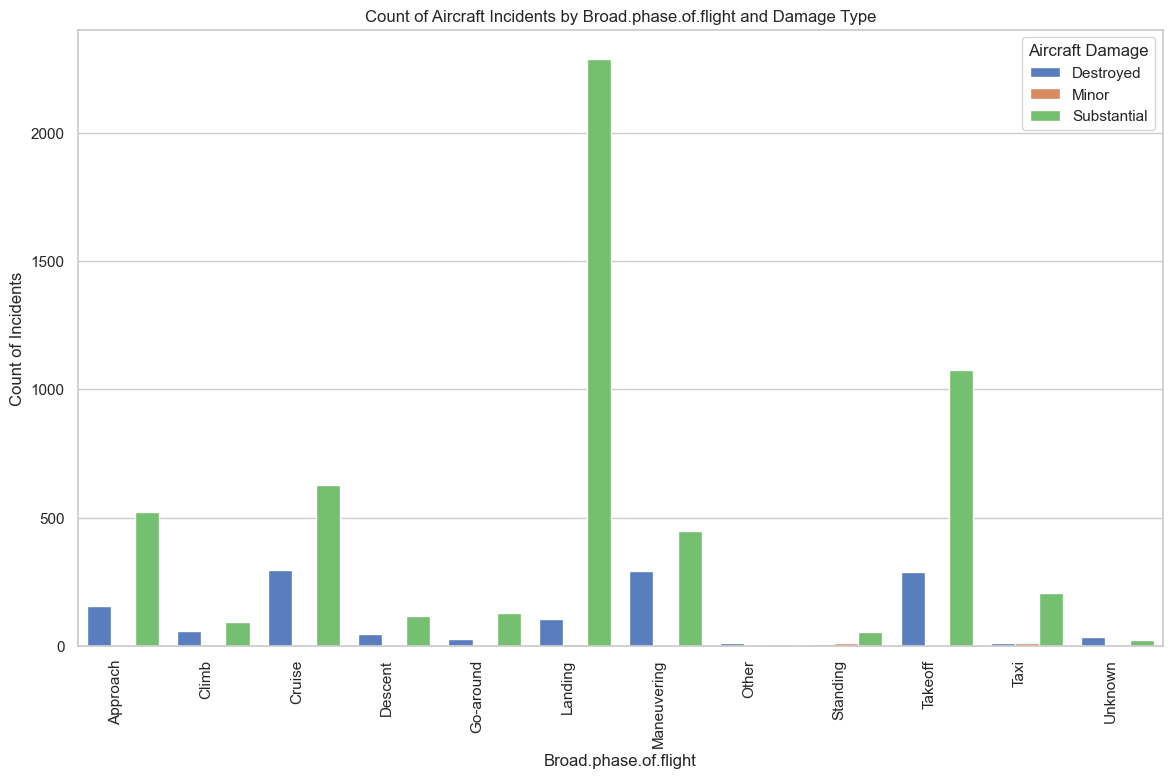

In [34]:
# Aggregate the data
agg_data = aviation_clean_ob5.groupby(['Broad.phase.of.flight', 'Aircraft.damage']).size().reset_index(name='Count')

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
aviation_clean_ob5_visual = sns.barplot(x="Broad.phase.of.flight", y="Count", hue="Aircraft.damage", data=agg_data, palette="muted")
aviation_clean_ob5_visual.set_xticklabels(aviation_clean_ob5_visual.get_xticklabels(), rotation=90, ha='right')
plt.xlabel("Broad.phase.of.flight")
plt.ylabel("Count of Incidents")
plt.title("Count of Aircraft Incidents by Broad.phase.of.flight and Damage Type")
plt.legend(title="Aircraft Damage")
plt.ylim(0,) 
show_plot(aviation_clean_ob5_visual)

## Objective 6>Find the best weather condition for operation
##### 1.This is a Bar plot showing Count of Aircraft ancidents Weather.Condition and Damage Type

C:\Users\josep\AppData\Local\Temp\ipykernel_34892\2382244957.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  aviation_clean_ob6_visual.set_xticklabels(aviation_clean_ob6_visual.get_xticklabels(), rotation=90, ha='right')


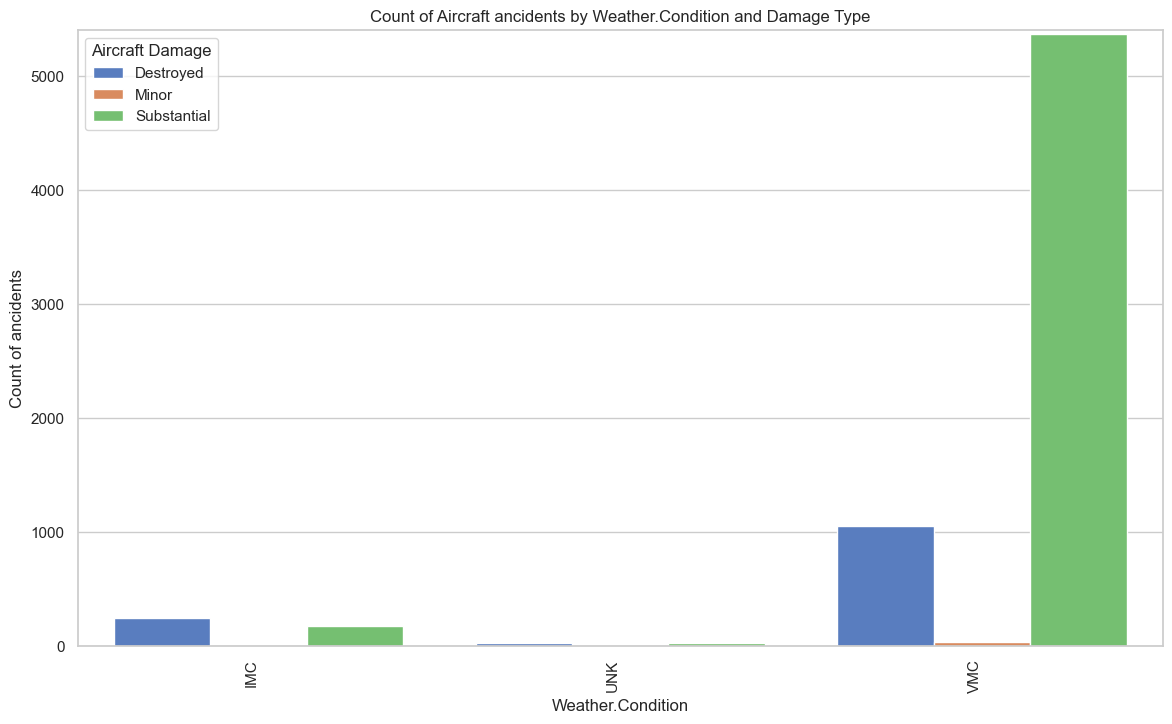

In [39]:
agg_data = aviation_clean_ob6.groupby(['Weather.Condition', 'Aircraft.damage']).size().reset_index(name='Count')

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
aviation_clean_ob6_visual = sns.barplot(x="Weather.Condition", y="Count", hue="Aircraft.damage", data=agg_data, palette="muted")
aviation_clean_ob6_visual.set_xticklabels(aviation_clean_ob6_visual.get_xticklabels(), rotation=90, ha='right')
plt.xlabel("Weather.Condition")
plt.ylabel("Count of ancidents")
plt.title("Count of Aircraft ancidents by Weather.Condition and Damage Type")
plt.legend(title="Aircraft Damage")
plt.ylim(0,5400) 
show_plot(aviation_clean_ob6_visual)

## Objective 7>Find wich aircraft poses more risk to human life
#### for this we are gonna create 4 subplots with the aircraft categoy  aganist the injuries

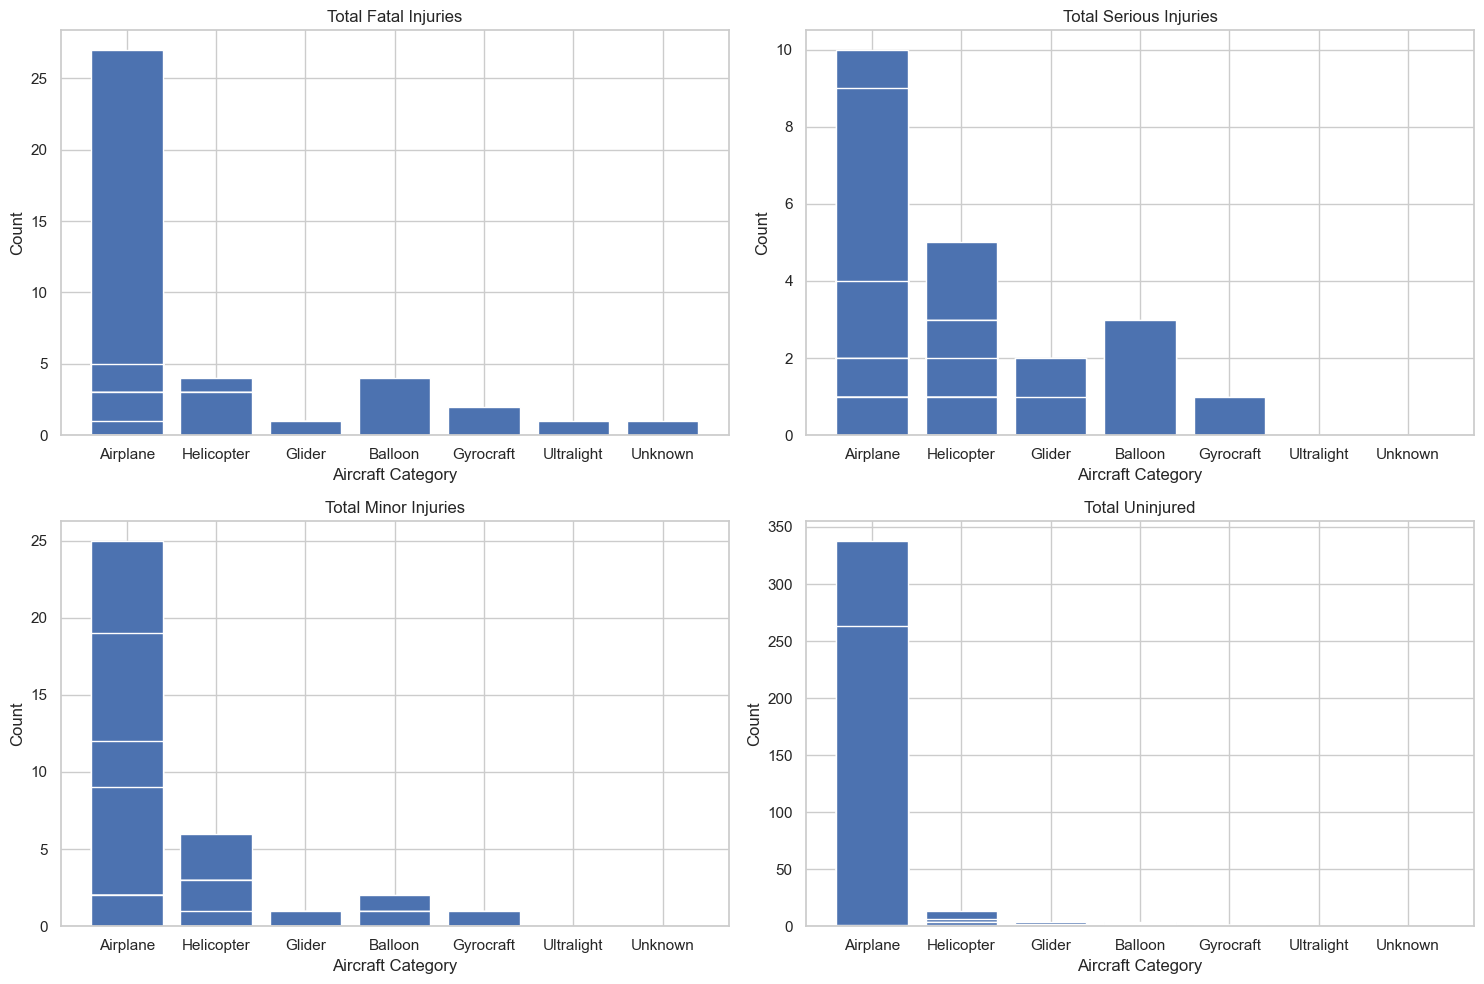

In [41]:
fig, aviation_clean_ob7_visual = plt.subplots(2, 2, figsize=(15, 10))
# Plot for Total Fatal Injuries
aviation_clean_ob7_visual[0, 0].bar(aviation_clean_ob7['Aircraft.Category'],aviation_clean_ob7['Total.Fatal.Injuries'])
aviation_clean_ob7_visual[0, 0].set_title('Total Fatal Injuries')
aviation_clean_ob7_visual[0, 0].set_xlabel('Aircraft Category')
aviation_clean_ob7_visual[0, 0].set_ylabel('Count')
 # Plot for Total Serious Injuries
aviation_clean_ob7_visual[0, 1].bar(aviation_clean_ob7['Aircraft.Category'],aviation_clean_ob7['Total.Serious.Injuries'])
aviation_clean_ob7_visual[0, 1].set_title('Total Serious Injuries')
aviation_clean_ob7_visual[0, 1].set_xlabel('Aircraft Category')
aviation_clean_ob7_visual[0, 1].set_ylabel('Count')
# Plot for Total Minor Injuries
aviation_clean_ob7_visual[1, 0].bar(aviation_clean_ob7['Aircraft.Category'],aviation_clean_ob7['Total.Minor.Injuries'])
aviation_clean_ob7_visual[1, 0].set_title('Total Minor Injuries')
aviation_clean_ob7_visual[1, 0].set_xlabel('Aircraft Category')
aviation_clean_ob7_visual[1, 0].set_ylabel('Count')
#Plot for Total Uninjured 
aviation_clean_ob7_visual[1, 1].bar(aviation_clean_ob7['Aircraft.Category'],aviation_clean_ob7['Total.Uninjured'])
aviation_clean_ob7_visual[1, 1].set_title('Total Uninjured')
aviation_clean_ob7_visual[1, 1].set_xlabel('Aircraft Category')
aviation_clean_ob7_visual[1, 1].set_ylabel('Count')
plt.tight_layout()
show_plot(aviation_clean_ob7_visual)
